In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
df = pd.read_csv('Trainable_data.csv')
df = df.drop(['Unnamed: 0','zip'],axis=1)
df.head()

,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,...,male_male_households,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
0,0,1,0.215686,0,0.0,0.522472,0.537313,0.482890,0.191542,0.526832,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
1,0,1,0.235294,0,0.0,0.533708,0.574627,0.528517,0.144279,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
2,0,1,0.254902,0,0.0,0.460674,0.462687,0.498099,0.184080,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
3,0,1,0.274510,0,0.0,0.370787,0.440299,0.429658,0.191542,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
4,0,1,0.294118,0,0.0,0.297753,0.462687,0.463878,0.184080,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0


In [4]:
data = df.drop('Liking',axis=1)
target = df['Liking']

In [5]:
df.Liking.value_counts()

1.0    2665
0.0     615
Name: Liking, dtype: int64

## UnderSampling

In [6]:
# Divide by class
df_class_0 = df[df['Liking'] == 0]
df_class_1 = df[df['Liking'] == 1]

In [7]:
# Undersample 0-class and concat the DataFrames of both class
df_class_1_under = df_class_1.sample(len(df_class_0))
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print('Random under-sampling:')
print(df_test_under.Liking.value_counts())

Random under-sampling:
0.0    615
1.0    615
Name: Liking, dtype: int64


In [8]:
X = df_test_under.drop('Liking',axis = 1)
y = df_test_under['Liking']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [10]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [11]:
model.score(X_test,y_test)

1.0

<AxesSubplot:>

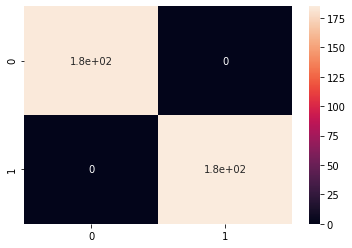

In [12]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       184
         1.0       1.00      1.00      1.00       185

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



## Over Sampling

In [14]:
df_class_0_over = df_class_0.sample(len(df_class_1), replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)
print('Random over-sampling:')
print(df_test_over.Liking.value_counts())

Random over-sampling:
0.0    2665
1.0    2665
Name: Liking, dtype: int64


In [15]:
df_test_over.head()

,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,...,male_male_households,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
615,4,2,0.803922,0,0.000000,0.264045,0.537313,0.110266,0.146766,0.526171,...,0.116041,0.553763,0.0,0.70834,0.0,0.0,1.0,0.046641,0.0,1.0
616,4,1,0.215686,0,0.000000,0.376404,0.537313,0.482890,0.191542,0.526832,...,0.116041,0.553763,0.0,0.70834,0.0,0.0,1.0,0.046641,0.0,1.0
617,4,1,0.235294,0,0.018072,0.382022,0.567164,0.555133,0.213930,0.527383,...,0.116041,0.553763,0.0,0.70834,0.0,0.0,1.0,0.046641,0.0,1.0
618,4,1,0.254902,0,0.014977,0.325843,0.485075,0.460076,0.231343,0.526942,...,0.116041,0.553763,0.0,0.70834,0.0,0.0,1.0,0.046641,0.0,1.0
619,4,1,0.274510,0,0.000000,0.275281,0.492537,0.513308,0.174129,0.526171,...,0.116041,0.553763,0.0,0.70834,0.0,0.0,1.0,0.046641,0.0,1.0


In [16]:
X = df_test_over.drop("Liking",axis=1)
y = df_test_over['Liking']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [18]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [19]:
model.score(X_test,y_test)

1.0

<AxesSubplot:>

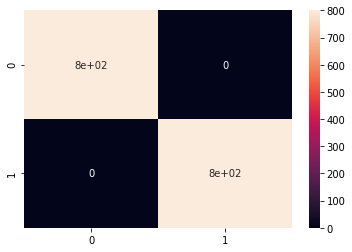

In [20]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       800
         1.0       1.00      1.00      1.00       799

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



## Ensambel undersampling

In [22]:
len(df_class_1),len(df_class_0) ,len(df_class_1)/len(df_class_0)

(2665, 615, 4.333333333333333)

In [23]:
len_cls_0 = len(df_class_0)
df_1 = pd.concat([df_class_1[:len_cls_0],df_class_0])
df_2 = pd.concat([df_class_1[len_cls_0:2*len_cls_0],df_class_0])
df_3 = pd.concat([df_class_1[2*len_cls_0:3*len_cls_0],df_class_0])
df_4 = pd.concat([df_class_1[3*len_cls_0:4*len_cls_0],df_class_0])
df_5 = pd.concat([df_class_1[4*len_cls_0:5*len_cls_0],df_class_0])

In [24]:
X = df_1.drop("Liking",axis=1)
y = df_1['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_1 = SVC()
model_1.fit(X_train,y_train)
print(model_1.score(X_test,y_test))
model_1.fit(X,y)

1.0


SVC()

In [25]:
X = df_2.drop("Liking",axis=1)
y = df_2['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_2 = SVC()
model_2.fit(X_train,y_train)
print(model_2.score(X_test,y_test))
model_2.fit(X,y)

1.0


SVC()

In [26]:
X = df_3.drop("Liking",axis=1)
y = df_3['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_3 = SVC()
model_3.fit(X_train,y_train)
print(model_3.score(X_test,y_test))
model_3.fit(X,y)

1.0


SVC()

In [27]:
X = df_4.drop("Liking",axis=1)
y = df_4['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_4 = SVC()
model_4.fit(X_train,y_train)
print(model_4.score(X_test,y_test))
model_4.fit(X,y)

1.0


SVC()

In [28]:
X = df_5.drop("Liking",axis=1)
y = df_5['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_5 = SVC()
model_5.fit(X_train,y_train)
print(model_5.score(X_test,y_test))
model_5.fit(X,y)

1.0


SVC()

In [29]:
def pred(x):
    y_pred = model_1.predict(x)+model_2.predict(x)+model_3.predict(x)+model_4.predict(x)+model_5.predict(x)
    return [1 if i>2 else 0 for i in y_pred]

<AxesSubplot:>

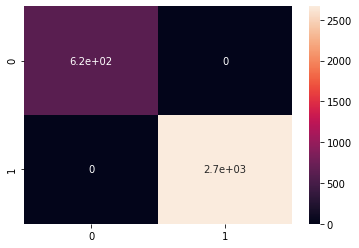

In [30]:
y_pred = pred(data)
sns.heatmap(confusion_matrix(target,y_pred),annot=True)

In [31]:
print(classification_report(target,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       615
         1.0       1.00      1.00      1.00      2665

    accuracy                           1.00      3280
   macro avg       1.00      1.00      1.00      3280
weighted avg       1.00      1.00      1.00      3280



## SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(data,target)
y_sm.value_counts()

0.0    2665
1.0    2665
Name: Liking, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3,stratify=y_sm)

In [35]:
X_train.head()

,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,...,median_year_structure_built,male_male_households,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces
1251,1,1,0.627451,0,0.000000,0.269663,0.432836,0.437262,0.194030,0.526171,...,0.589744,0.061433,0.451613,1.000000,0.234147,0.461538,0.125683,0.000000,0.046641,0.0
1547,4,1,0.352941,0,0.148946,0.230337,0.477612,0.585551,0.201493,0.526722,...,0.282051,1.000000,0.467742,0.050895,0.452728,0.000000,0.000000,0.387097,0.056080,0.0
698,4,2,0.607843,0,0.000000,0.342697,0.537313,0.353612,0.191542,0.526171,...,0.076923,0.116041,0.553763,0.000000,0.708340,0.000000,0.000000,1.000000,0.046641,0.0
2982,4,1,0.352941,0,0.148946,0.230337,0.477612,0.585551,0.201493,0.526722,...,0.564103,0.051195,0.650538,0.000000,0.013600,0.000000,0.000000,0.000000,0.000000,0.0
403,4,2,0.686275,0,0.006932,0.252809,0.537313,0.509506,0.179104,0.526281,...,0.564103,0.201365,0.838710,0.000000,0.053416,0.714286,0.928962,0.000000,0.734592,0.0


In [36]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [37]:
model.score(X_test,y_test)

1.0

<AxesSubplot:>

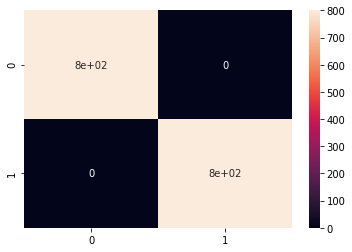

In [38]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       799
         1.0       1.00      1.00      1.00       800

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599

